In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
import warnings
warnings.filterwarnings('ignore')
import pickle
from bs4 import BeautifulSoup
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sandeepchittiboina/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4,4))
    sns.heatmap(cm, cbar=False, cmap='viridis', annot=True, fmt='.0f')
    plt.title("Confusion matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    return plt.show()


In [3]:
def get_accuracy_score(model,X_train, y_train, X_test, y_test, return_model=False):
    model = model.fit(X_train, y_train)
    y_preds_train = model.predict(X_train)
    y_preds = model.predict(X_test)
    print("Train accuracy:", accuracy_score(y_train, y_preds_train))
    print("Test accuracy:", accuracy_score(y_test, y_preds))
    print()
    return model if return_model==True else None
data = pd.read_csv('/Users/sandeepchittiboina/Downloads/archive/Reviews.csv')
data.head(3)
data.isna().sum().to_frame(name='# Missing values')
total_rows =  data.shape[0]
data.dropna(how='any',inplace=True)
remaining_rows= data.shape[0]
removed_rows = total_rows-remaining_rows
a =  data.shape[0]
data = data.loc[data.Score != 3]
b = data.shape[0]
data.loc[:, "Sentiment"] = data.Score.apply(lambda x : 1 if x > 3 else 0)
data = data[["Text", "Sentiment"]]
a =  data.shape[0]
data.drop_duplicates(inplace=True)
b = data.shape[0]
neg_data = data.loc[data.Sentiment == 0]


In [4]:
pos_data = data.loc[data.Sentiment == 1][:neg_data.shape[0]]

In [5]:
a = data.shape[0]
data = pd.concat([pos_data, neg_data])
data = data.sample(frac=1, random_state=1)
b = data.shape[0]

total_stopwords = set(stopwords.words('english'))
negative_stop_words = set(word for word in total_stopwords if "n't" in word or 'no' in word)
final_stopwords = total_stopwords.symmetric_difference(negative_stop_words)
stemmer = PorterStemmer()


In [6]:
def preprocessor(review):
    HTMLTAGS = re.compile('<.*?>')
    review = HTMLTAGS.sub(r'', review)
    table = str.maketrans(dict.fromkeys(string.punctuation))
    review = review.translate(table)
    remove_digits = str.maketrans('', '', string.digits)
    review = review.translate(remove_digits)
    review = review.lower()
    MULTIPLE_WHITESPACE = re.compile(r"\s+")
    review = MULTIPLE_WHITESPACE.sub(" ", review).strip()
    review = [word for word in review.split() if word not in final_stopwords]
    review = ' '.join([stemmer.stem(word) for word in review])
    return review


In [7]:
def create_model():

	X = data['Text']
	y = data['Sentiment']
	X = X.apply(preprocessor)
	X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
	vectorizer = TfidfVectorizer(max_features=15000)
	vectorizer.fit(X_train)
	tfidf_X_train = vectorizer.transform(X_train)
	tfidf_X_test = vectorizer.transform(X_test)
	final_model= get_accuracy_score(MultinomialNB(),tfidf_X_train, y_train, tfidf_X_test, y_test,return_model=True)
	y_pred = final_model.predict(tfidf_X_test)
	plot_confusion_matrix(y_test, y_pred)

	with open("tfidf_vectorizer.pkl", "wb") as f:
	    pickle.dump(vectorizer, f)

	with open("model.pkl", "wb") as f:
	    pickle.dump(final_model, f)


In [8]:
pip install NLP-python

Note: you may need to restart the kernel to use updated packages.


Train accuracy: 0.8815798696292143
Test accuracy: 0.8618139763089647



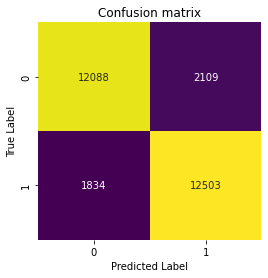

In [11]:
create_model()

In [ ]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
#from NLP import preprocessor
from NLP import NLP
nlp = NLP()



with open("tfidf_vectorizer.pkl", "rb") as f:
    vectorizer = pickle.load(f)

with open("model.pkl", "rb") as f:
    model = pickle.load(f)

def pred(text):
    review = preprocessor(text)
    x = vectorizer.transform([review])
    y = model.predict(x)[0]
    return y

while(1):
	s = input("Enter review: ")
	if(s == "exit"):
		break
	print(pred(s))


Enter review: this movie was bad
1
Enter review: this movie was good
1
Enter review: good
1
Enter review: bad
0
Enter review: its very bad
0
Enter review: worst movie
0
Enter review: best movie ever
1
